In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# WholeSale Customer Data - Overview

In [2]:
sales = pd.read_csv('C:/Users/SOWMYA/Desktop/Datasets/Wholesalecustomersdata.csv')
sales.head()
sales.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


# Additional Information on WholeSale Data

In [3]:
sales.info()
print('Sales data Shape : {}'.format(sales.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB
Sales data Shape : (440, 8)


# WholeSale Customer Data Summary Statistics

In [4]:
sales.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# KMeans Clustering Model having Clusters - 3

In [5]:
#sales_feature = sales.drop(['Channel','Region'], axis=1).values
model = KMeans(n_clusters=3)
model.fit(sales)
labels = model.predict(sales)
print(labels)

[0 0 0 0 1 0 0 0 0 2 0 0 1 0 1 0 0 0 0 0 0 0 1 2 1 0 0 0 2 1 0 0 0 1 0 0 1
 0 2 1 1 0 0 2 0 2 2 2 0 2 0 0 1 0 1 0 2 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 2 2 1 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 2 0 0
 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 2 1 0 0 2 0 0 0 2 0 2 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 2 0 1 0 1 0 0 1
 1 0 0 1 0 0 2 2 0 2 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 2 0 2 0 0 2 0 1 2 0 0 0 0 0 0 2 0 0 0 0 1 1 0 0 0 0 0 2 0
 2 0 1 0 0 0 0 0 0 0 2 0 0 0 1 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 0 1 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1
 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 2 0 0]


# Scatter plot for Milk Vs. Fresh for WholeSale Data

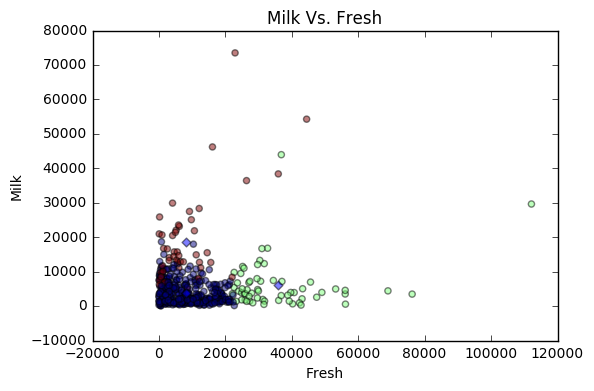

In [6]:
xs = sales['Fresh']
ys = sales['Milk']
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Milk Vs. Fresh')
plt.scatter(xs, ys, c=labels, alpha=0.5)
centroids = model.cluster_centers_ #To highlight the Centroids for the given Clusters
centroids_x = centroids[:,2]
centroids_y = centroids[:,3]
plt.scatter(centroids_x, centroids_y, marker='D', alpha=0.5)
plt.show()

# Aligning Labels and Channel

In [7]:
channel = sales['Channel']
region  = sales['Region']
df = pd.DataFrame({'labels': labels, 'channel': channel, 'region': region})
print(df.head())

   channel  labels  region
0        2       0       3
1        2       0       3
2        2       0       3
3        1       0       3
4        2       1       3


# CrossTab of Labels and Channel

In [8]:
ct = pd.crosstab(df['labels'], df['channel'])
print(ct)

channel    1   2
labels          
0        244  86
1         52   8
2          2  48


# Measuring Clustering Quality without using any pre-processing technique

In [9]:
print(model.inertia_)

80332414178.0


# Number of Clusters to Choose 

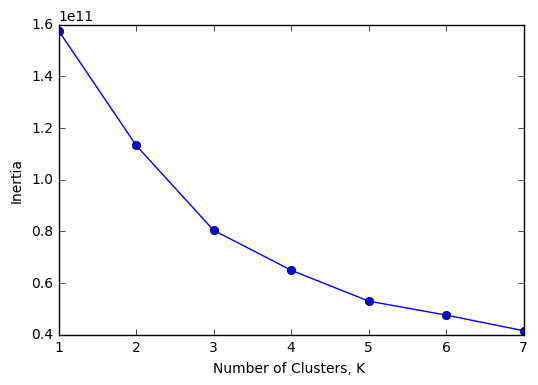

In [10]:
ks = range(1,8)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(sales)
    inertias.append(model.inertia_)

# Plot ks- range of Clusters Vs. Inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of Clusters, K ')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

 From the above plot we can safely say that 3 is a good number of Clusters for WholeSale Customer Data

# Transforming Features for better Clusterings

In [11]:
#Feature Variances
sales.drop(['Channel', 'Region'], axis = 1).describe().var()

Fresh               1.402051e+09
Milk                6.170569e+08
Grocery             9.781298e+08
Frozen              4.355803e+08
Detergents_Paper    1.929771e+08
Delicassen          2.746378e+08
dtype: float64

As you can see WholeSale Customer Data has very different Variances! For example - Milk Feature has higher Variances than the Fresh Feature and this has been already seen in the above respective Scatter plot

# Transform Features of the Data to Standardized Data

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(sales)
sales_feature_scaled = scaler.transform(sales)
#sales_feature_transform = pd.DataFrame(sales_feature_scaled)
#sales_feature_transform.describe()

# Pipeline combine multiple steps Using StandardScaler pre-processing

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
kmeans = KMeans(n_clusters = 3) # As we agree from the above plot, Number of Clusters to be three
pipeline = make_pipeline(scaler, kmeans)
labels = pipeline.fit_predict(sales)

df = pd.DataFrame({'labels': labels, 'Region': sales['Region'], 'Channel': sales['Channel']})
ct = pd.crosstab(df['labels'], df['Region'])
ct1 = pd.crosstab(df['labels'], df['Channel'])
print(ct)
print('\n',ct1)


Region   1   2    3
labels             
0       16  17   97
1       59  28  209
2        2   2   10

 Channel    1    2
labels           
0          0  130
1        295    1
2          3   11


# Measuring Quality of Clusters post to Transforming Features

In [14]:
print(kmeans.inertia_)

2147.67858416


# Pipeline Combine Multiple Steps using Normalizer pre-processing

In [15]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

normalizer = Normalizer()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(normalizer, kmeans)
labels = pipeline.fit_predict(sales)

df = pd.DataFrame({'labels': labels, 'Region': sales['Region'], 'Channel': sales['Channel']})
ct = pd.crosstab(df['labels'], df['Region'])
ct1 = pd.crosstab(df['labels'], df['Channel'])
print(ct)
print('\n', ct1)

#Measuring Quality of Clustering
print('The Measure for Quality of Clustering using Normalizer (lower inertia indicates good Quality of Clustering)',kmeans.inertia_)

Region   1   2    3
labels             
0       31  19  127
1       34  20  156
2       12   8   33

 Channel    1    2
labels           
0         68  109
1        180   30
2         50    3
The Measure for Quality of Clustering using Normalizer (lower inertia indicates good Quality of Clustering) 45.9372418236


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


# Hierarchial Clustering 

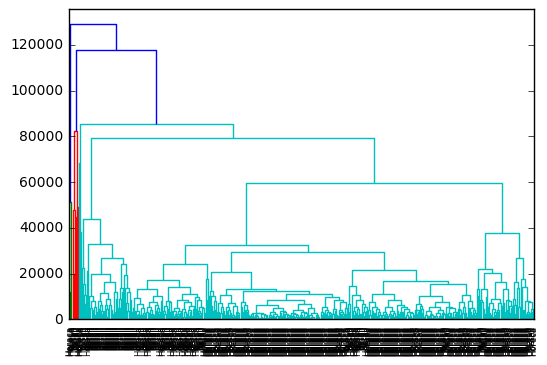

In [16]:
import numpy as np
sales_labels = list(sales['Channel'].map({1 : 'Horeca', 2: 'Retail'}))

from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(sales, method='complete')

dendrogram(mergings, labels= sales_labels , leaf_rotation = 90, leaf_font_size=6)

plt.show()


# Fitting Hierarchial Clustering in Pipeline

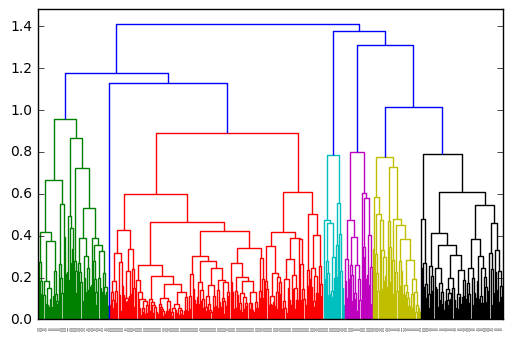

In [17]:
from sklearn.preprocessing import normalize # Using Normalize function to fit the Hierarchial Clustering in Pipeline
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram

normalized_sales = normalize(sales)

mergings = linkage(normalized_sales, method='complete')

dendrogram(mergings, labels = sales_labels, leaf_rotation = 90, leaf_font_size = 0.2)

plt.show()
